In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
rfe = pd.read_csv('rfe.csv')[['classifier','n_features','train_time','accuracy','precision','recall','f1_score']]
rrf = pd.read_csv('rrf.csv')[['classifier','n_features','train_time','accuracy','precision','recall','f1_score']]

In [72]:
rrf_mean = rrf.groupby(['n_features']).mean().reset_index()
rfe_mean = rfe.groupby(['n_features']).mean().reset_index()

In [91]:
rfe_mean[['accuracy','precision','recall','f1_score']] =  rfe_mean[['accuracy','precision','recall','f1_score']]*100
rfe_mean

,n_features,train_time,accuracy,precision,recall,f1_score
0,3,16.964510,69.2400,71.3550,67.9850,68.7450
1,5,17.281525,70.2550,71.8000,70.0675,70.1800
2,8,17.436769,69.8925,72.1250,68.2800,69.4400
3,10,18.545783,69.2200,71.5425,67.2550,68.6475
4,15,22.099243,69.2675,71.4550,67.5125,68.7650
5,21,29.655341,68.9400,70.9400,67.5675,68.5175


In [92]:
rrf_mean[['accuracy','precision','recall','f1_score']] =  rrf_mean[['accuracy','precision','recall','f1_score']]*100
rrf_mean

,n_features,train_time,accuracy,precision,recall,f1_score
0,3,16.187780,68.4325,69.5400,69.1875,68.7300
1,5,16.303250,70.1100,72.5375,67.9550,69.4450
2,8,16.106280,69.6775,72.1750,67.3950,69.0550
3,10,20.125571,69.0275,71.5400,66.5325,68.2750
4,15,6089.786984,69.2025,71.3850,67.4700,68.6825
5,21,28.296007,68.9025,70.8850,67.5675,68.4900


In [100]:
abs(rfe_mean['f1_score'] - rrf_mean['f1_score'])

0    0.0150
1    0.7350
2    0.3850
3    0.3725
4    0.0825
5    0.0275
Name: f1_score, dtype: float64

In [93]:
def create_graph(data1, data2, metric, colour1='#1167b1', colour2='#dc6601', w=8, h=4):
    # Savefile name
    save = str(metric) + "_plot"
    title = metric.capitalize() +" for each set of features"
    
    # Fig style
    sns.set(style="darkgrid")
    
    # Set the figure size
    plt.figure(figsize=(w, h))

    # Points
    sns.lineplot(data=data1, x="n_features", y=metric, estimator='max', color=c1, zorder=1);
    sns.lineplot(data=data2, x="n_features", y=metric, estimator='max', color=c2, zorder=1);

    # Lines
    sns.scatterplot(data=data1, x="n_features", y=metric, estimator=sum, ci=None,  color=c1, zorder=2);
    sns.scatterplot(data=data2, x="n_features", y=metric, estimator=sum, ci=None,  color=c2, zorder=2);
    
    # Legend
    plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

    # Set label for x-axis and y-axis and title
    plt.xlabel( "Number of features" , size = 12 );
    plt.ylabel( metric.capitalize() , size = 12 );
    plt.title( title , size = 16 );

    # Save plot
    plt.savefig(save)

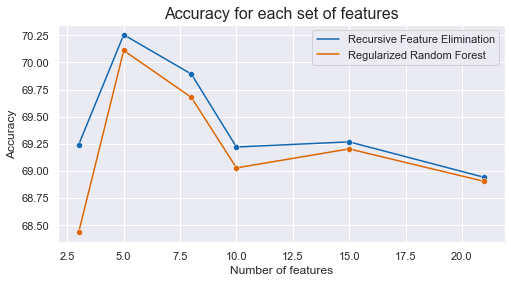

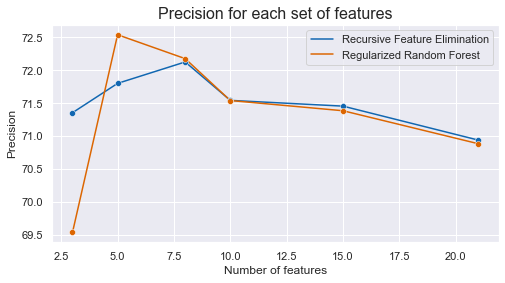

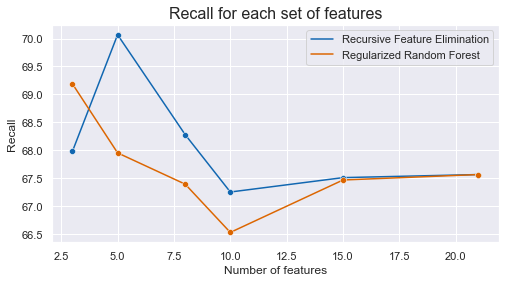

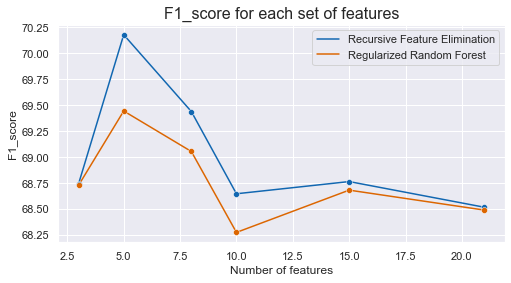

In [94]:
create_graph(rfe_mean, rrf_mean, 'accuracy')
create_graph(rfe_mean, rrf_mean, 'precision')
create_graph(rfe_mean, rrf_mean, 'recall')
create_graph(rfe_mean, rrf_mean, 'f1_score')

In [81]:
s.capitalize()

'Hello'

In [103]:

import dataframe_image as dfi
dfi.export(rrf_mean,"rrf_df.png")
dfi.export(rfe_mean,"rfe_df.png")